# Sahel and West Africa Club Africapolis with urban green space indicators

## Background

[Africapolis](https://africapolis.org/en) is a dataset designed by thw [Sahel and West Africa Club](https://www.oecd.org/swac/) to provide a much needed standardised and geospatial database on urbanisation dynamics in Africa, with the aim of making urban data in Africa comparable across countries and across time. This version of Africapolis is the first time that the data for the 54 countries currently covered are available for the same base year — 2015. In addition, Africapolis closes one major data gap by integrating 7,496 small towns and intermediary cities between 10,000 and 300,000 inhabitants.

Africapolis data is based on a large inventory of housing and population censuses, electoral registers and other official population sources, in some cases dating back to the beginning of the 20th century. While essential for building any database, the regularity, the detail and the reliability of these sources vary from country to country, and from period to period. Census data or official population records are often more than 10 years old and, in certain cases, go back 30 or more years. Given the pace of demographic and urban change these are significant periods.

Satellite and aerial images are then used to fill in and complete the gaps and inconsistencies in official records, by capturing the physical evidence on the ground, that is the built-up area and the precise location of settlements. Other official cartographic resources, such as administrative boundaries, are also used to link population data to observed information on the built-up areas.

The teams working on Africapolis, at e-Geopolis and at the OECD Sahel and West Africa Club, have worked for years to build the Africapolis database, learning during the process, adding new sources and improving on the tools and methodology used to make the data as precise as possible.

Africapolis will remain an ongoing endeavour, providing data and evidence to support cities and governments to make urban areas more inclusive, productive and sustainable. We will keep looking for new ways, new tools and new data to improve Africapolis and its relevance for the African continent and invite you to contribute.


### Description
This notebook demostrates how to load and visualise the OECD SWAC Africapolis agglomerations.
The notebook covers:
1. Getting a list of available polygons in a given area
2. Select and plot a single polygon and its urban green space indicators

## Getting started

To run this analysis, run all the cells in the notebook, starting with the “Load packages” cell.

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import datacube
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from datacube.utils.geometry import Geometry
from deafrica_tools.plotting import display_map
from deafrica_tools.areaofinterest import define_area
from load_africapolis import get_africapolis

### Analysis parameters

The following cell sets the parameters, which define the area of interest and the length of time to conduct the analysis over.
The parameters are

* `lat`: The central latitude to analyse (e.g. `10.338`).
* `lon`: The central longitude to analyse (e.g. `-1.055`).
* `buffer`: The number of square degrees to load around the central latitude and longitude.
For reasonable loading times, set this as `0.1` or lower.
* `fire_date`: The event date of the fire (e.g. `'2020-01-01'`).
* `baseline_length`: To understand the effect of the fire, the analysis produces a baseline image, which is compiled from all available data over the `baseline_length` time period prior to the `fire_date`. This can be set as `'3 months'`, `'6 months'` or `'12 months'`.


#### Select location
To define the area of interest, there are two methods available:

1. By specifying the latitude, longitude, and buffer. This method requires you to input the central latitude, central longitude, and the buffer value in square degrees around the center point you want to analyze. For example, `lat = 10.338`, `lon = -1.055`, and `buffer = 0.1` will select an area with a radius of 0.1 square degrees around the point with coordinates (10.338, -1.055).

    Alternatively, you can provide separate buffer values for latitude and longitude for a rectangular area. For example, `lat = 10.338`, `lon = -1.055`, and `lat_buffer = 0.1` and`lon_buffer = 0.08` will select a rectangular area extending 0.1 degrees north and south, and 0.08 degrees east and west from the point `(10.338, -1.055)`.

   For reasonable loading times, set the buffer as `0.1` or lower.

2. By uploading a polygon as a `GeoJSON or Esri Shapefile`. If you choose this option, you will need to upload the geojson or ESRI shapefile into the Sandbox using Upload Files button <img align="top" src="../Supplementary_data/upload_files_icon.png"> in the top left corner of the Jupyter Notebook interface. ESRI shapefiles must be uploaded with all the related files `(.cpg, .dbf, .shp, .shx)`. Once uploaded, you can use the shapefile or geojson to define the area of interest. Remember to update the code to call the file you have uploaded.

To use one of these methods, you can uncomment the relevant line of code and comment out the other one. To comment out a line, add the `"#"` symbol before the code you want to comment out. By default, the first option which defines the location using latitude, longitude, and buffer is being used.

In [2]:
# Method 1: Specify the latitude, longitude, and buffer
# aoi = define_area(lat=-25.9962, lon=28.4438, buffer=0.5)
aoi = define_area(lat=6.6975, lon=-1.6286, buffer=0.1)

# Method 2: Use a polygon as a GeoJSON or Esri Shapefile. 
# aoi = define_area(vector_path='aoi.shp')

#Create a geopolygon and geodataframe of the area of interest
geopolygon = Geometry(aoi["features"][0]["geometry"], crs="epsg:4326")
geopolygon_gdf = gpd.GeoDataFrame(geometry=[geopolygon], crs=geopolygon.crs)

# Get the latitude and longitude range of the geopolygon
lat_range = (geopolygon_gdf.total_bounds[1], geopolygon_gdf.total_bounds[3])
lon_range = (geopolygon_gdf.total_bounds[0], geopolygon_gdf.total_bounds[2])

display_map(x=lon_range, y=lat_range)

## Getting the data
The `load_africapolis` module allows you to query the OECD SWAC Africapolis urban agglomerations from the Geoserver. There are two layers available: `africapolis_2015` and `africapolis_2020`. 

We can get a list of urban aglomeration polygons( including the urban green space indicators) inside a bounding box of coordinates using `get_africapolis`.

In [3]:
# Create a bounding box from study area coordinates
bbox = (lon_range[0], lat_range[0], lon_range[1], lat_range[1])

# Load Africapolis data. 
agglomerations = get_africapolis(bbox=bbox, 
                                      layer='africapolis_2020')

# Print list of urban agglomerations and their green urban green space indicators
agglomerations.head()

,id,agglosID,agglosName,ISO3,Pop2020,p_Urban_green_space_WC2020,p_Tree_cover_WC2020,p_Urban_green_space_WC2021,p_Tree_cover_WC2021,Longitude,Latitude,color_HEX,geometry
0,africapolis_2020.5112,5112,Kumasi,GHA,2436114,40.1,18.5,42.3,20.7,-1.624333,6.670937,#f1b78c,"MULTIPOLYGON (((-1.85330 6.65800, -1.85330 6.6..."
1,africapolis_2020.12047,12047,Foase kokoben,GHA,10525,66.4,34.3,68.0,46.0,-1.748245,6.632355,#602317,"MULTIPOLYGON (((-1.76110 6.63590, -1.76110 6.6..."


## Displaying the polygons
Once the urban agglomeration polygons are in memory, you can plot them directly, or explore them in an interactive window.

<Axes: >

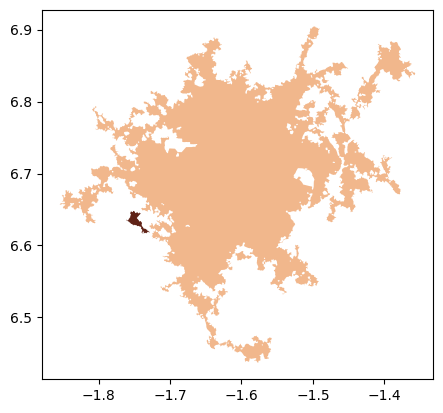

In [4]:
agglomerations.plot(color=agglomerations['color_HEX'])

In [5]:
# Explore the urban agglomeration polygons located within the bounding box
agglomerations.explore(tiles="https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}",
                attr='http://mt0.google.com/vt/lyrs=y&hl=en&x={x}&y={y}&z={z}')

### Getting information for a speacic urban agglomeration

In [6]:
selected_agglomeration = agglomerations[agglomerations["agglosName"] == "Kumasi"]
selected_agglomeration

,id,agglosID,agglosName,ISO3,Pop2020,p_Urban_green_space_WC2020,p_Tree_cover_WC2020,p_Urban_green_space_WC2021,p_Tree_cover_WC2021,Longitude,Latitude,color_HEX,geometry
0,africapolis_2020.5112,5112,Kumasi,GHA,2436114,40.1,18.5,42.3,20.7,-1.624333,6.670937,#f1b78c,"MULTIPOLYGON (((-1.85330 6.65800, -1.85330 6.6..."


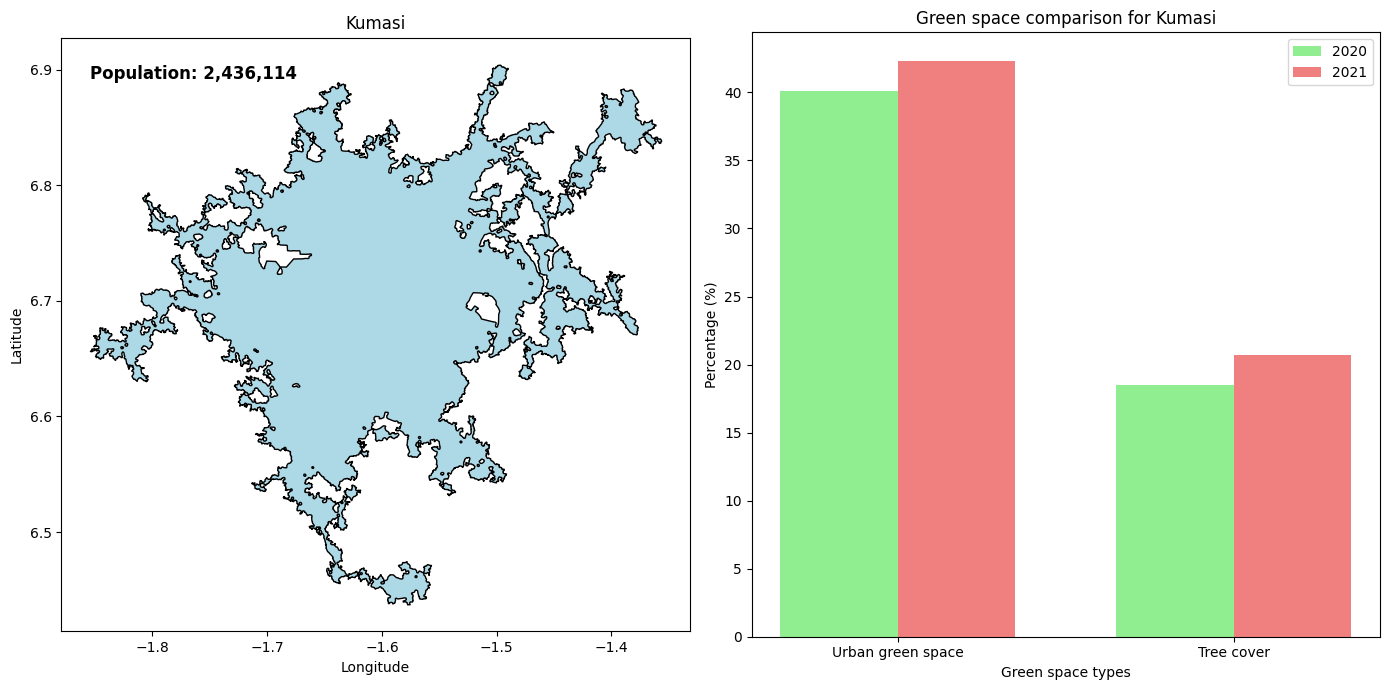

In [7]:
# Create a figure with two subplots (one for the polygon, one for the bar chart)
fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(14, 7))

# Plot the selected agglomeration polygon on the map axis (ax_map)
selected_agglomeration.plot(ax=ax_map, color='lightblue', edgecolor='black')
ax_map.set_title(f"{selected_agglomeration['agglosName'].iloc[0]}")
ax_map.set_xlabel("Longitude")
ax_map.set_ylabel("Latitude")

# Get the top-left corner of the bounding box
bbox = selected_agglomeration.total_bounds
top_left_x, top_left_y = bbox[0], bbox[3]

# Get the population for 2020
pop_label = selected_agglomeration['Pop2020'].iloc[0]

# Add population label at the top-left corner with styling
ax_map.text(
    top_left_x, top_left_y, f"Population: {pop_label:,}",
    fontsize=12, 
    fontweight='bold',  
    ha='left', va='top',  
    color='black',  
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7) 

# Data for the bar chart
labels = ['Urban green space', 'Tree cover'] 
wc2020 = [
    selected_agglomeration['p_Urban_green_space_WC2020'].iloc[0],
    selected_agglomeration['p_Tree_cover_WC2020'].iloc[0]
]
wc2021 = [
    selected_agglomeration['p_Urban_green_space_WC2021'].iloc[0],
    selected_agglomeration['p_Tree_cover_WC2021'].iloc[0]
]

# Bar chart width and position
bar_width = 0.35
index = np.arange(len(labels))  # Position of the bars on the x-axis

# Plotting the grouped bar chart
ax_bar.bar(index - bar_width/2, wc2020, bar_width, label='2020', color='lightgreen')
ax_bar.bar(index + bar_width/2, wc2021, bar_width, label='2021', color='lightcoral')

# Adding labels and title
ax_bar.set_xlabel('Green space types')
ax_bar.set_ylabel('Percentage (%)')
ax_bar.set_title(f"Green space comparison for {selected_agglomeration['agglosName'].iloc[0]}")
ax_bar.set_xticks(index)
ax_bar.set_xticklabels(labels)
ax_bar.legend()

# Show the plot
plt.tight_layout()
plt.show()


---

## Additional information

<b> License </b> The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0).

Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

<b> Contact </b> If you need assistance, please post a question on the [DE Africa Slack channel](https://digitalearthafrica.slack.com/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).

If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

<b> Compatible datacube version </b>

In [8]:
print(datacube.__version__)

1.8.19


**Last Tested:**

In [9]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2024-12-10'